<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/Week5/ChoiHangJune_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
drive_path = "/content/"

train = pd.read_csv(drive_path + "train.csv")
test = pd.read_csv(drive_path + "test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [78]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [80]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


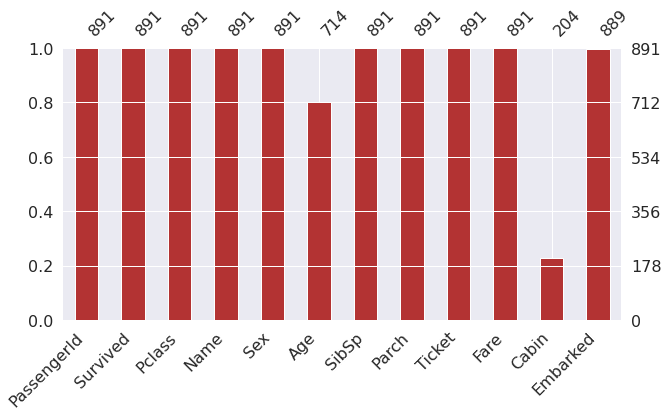

In [83]:
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

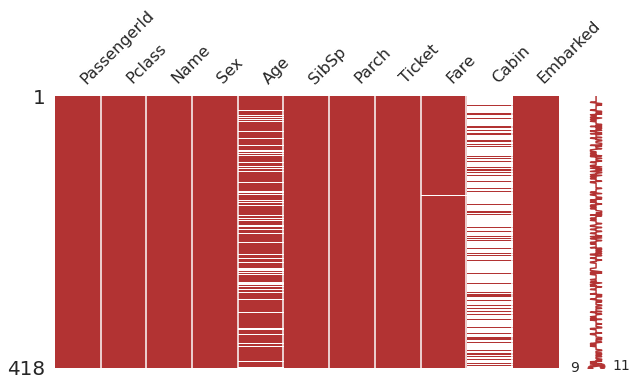

In [84]:
msno.matrix(test, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

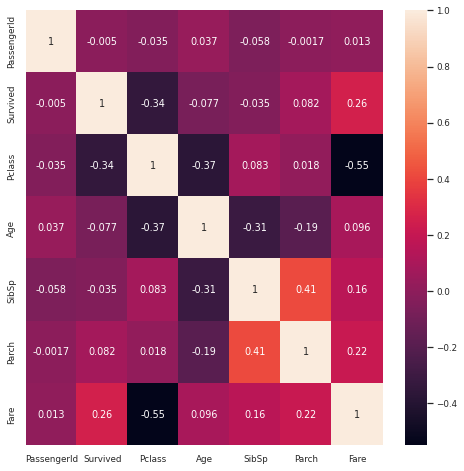

In [85]:
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar = True)
plt.show()

In [86]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


In [87]:
data_num = data.loc[:,['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기 : ", X_train.shape, y_train.shape)
print("Test 데이터셋 크기 : ", X_test.shape)

Train 데이터셋 크기 :  (891, 5) (891,)
Test 데이터셋 크기 :  (418, 5)


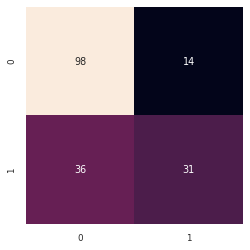

In [88]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)
y_val_pred = lr_model.predict(X_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy: %.4f"% accuracy_score(y_val, y_val_pred))
print("Precision: %.4f"% precision_score(y_val, y_val_pred))
print("Recall: %.4f"% recall_score(y_val, y_val_pred))
print("F1: %.4f"% f1_score(y_val, y_val_pred))
print("AUC: %.4f"% roc_auc_score(y_val, y_val_pred))

Accuracy: 0.7207
Precision: 0.6889
Recall: 0.4627
F1: 0.5536
AUC: 0.6688


In [90]:
y_test_pred = lr_model.predict(X_test)

submission['Survived'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [91]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

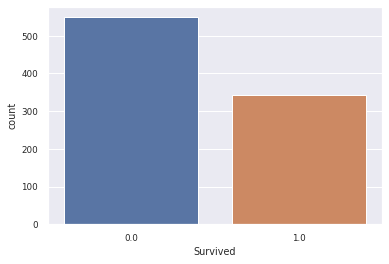

In [92]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

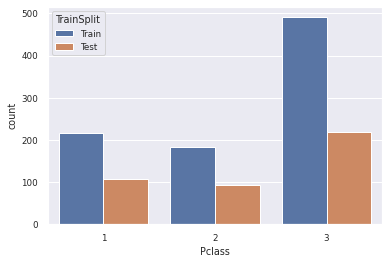

In [93]:
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

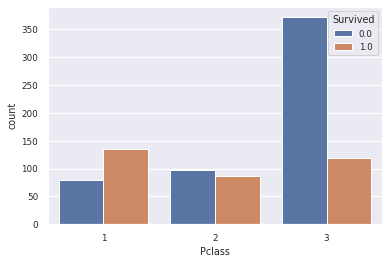

In [94]:
sns.countplot(x='Pclass', hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

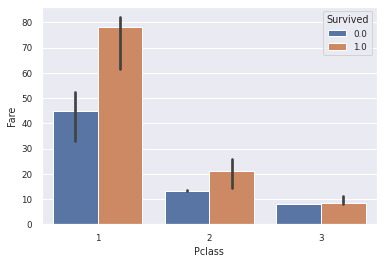

In [95]:
sns.barplot(x='Pclass', y='Fare', hue = 'Survived', data=data[data['TrainSplit']=='Train'], estimator=np.median)
plt.show()

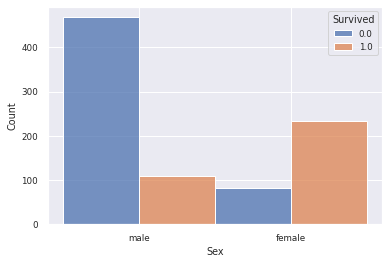

In [96]:
sns.histplot(x='Sex',hue='Survived', multiple='dodge', data=data[data['TrainSplit']=='Train'])
plt.show()

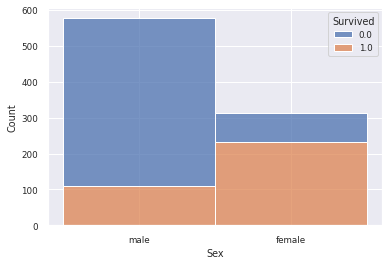

In [97]:
sns.histplot(x='Sex',hue='Survived', multiple='stack', data=data[data['TrainSplit']=='Train'])
plt.show()

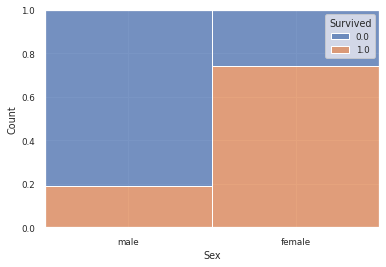

In [98]:
sns.histplot(x='Sex',hue='Survived', multiple='fill', data=data[data['TrainSplit']=='Train'])
plt.show()

In [99]:
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex']==data['Sex'].astype(int)

data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [100]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [101]:
title_name = data['Name'].str.split(", ", expand=True)[1]
title_name

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: 1, Length: 1309, dtype: object

In [102]:
title = title_name.str.split(". ", expand=True)[0]
title.value_counts(dropna=False)

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
th            1
Jonkheer      1
Dona          1
Name: 0, dtype: int64

In [103]:
title = title.replace(['Ms'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'],'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'Priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Mr         757
Miss       262
Mrs        197
Master      61
Priest      16
Noble        8
Officer      7
th           1
Name: Title, dtype: int64

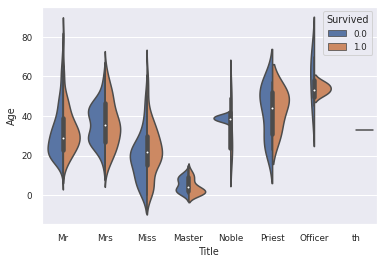

In [104]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [105]:
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [106]:
for title in data['Title'].unique():
  print('%s 결측값 개수 : ' %title, data.loc[data['Title'] == title, 'Age'].isnull().sum())
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

print("\n")
print("Age 열의 결측값 개수 : ", data['Age'].isnull().sum())

Mr 결측값 개수 :  176
Mrs 결측값 개수 :  27
Miss 결측값 개수 :  51
Master 결측값 개수 :  8
Noble 결측값 개수 :  0
Priest 결측값 개수 :  1
Officer 결측값 개수 :  0
th 결측값 개수 :  0


Age 열의 결측값 개수 :  0


<function matplotlib.pyplot.show>

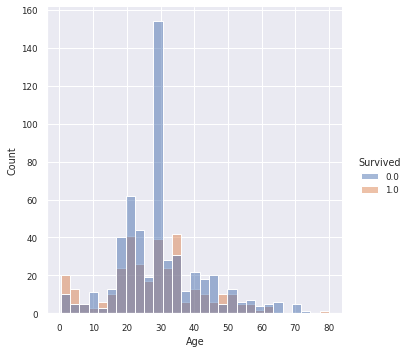

In [107]:
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show

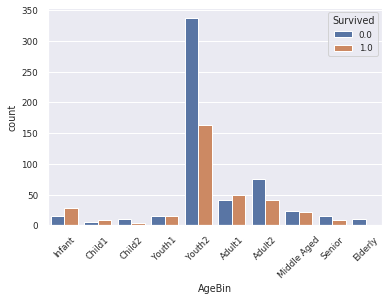

In [108]:
bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeBin', hue = 'Survived', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

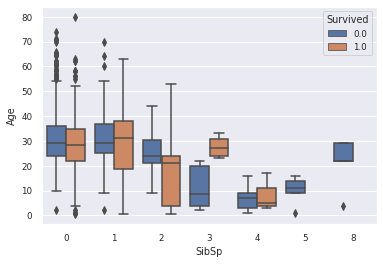

In [109]:
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

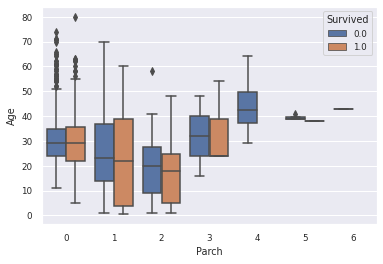

In [110]:
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

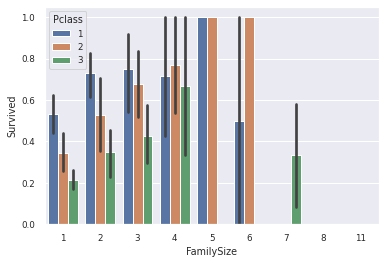

In [111]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

sns.barplot(x='FamilySize', y = 'Survived', hue='Pclass', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()

In [112]:
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [113]:
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
print(p3_fare_mean)
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

13.302888700564969


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


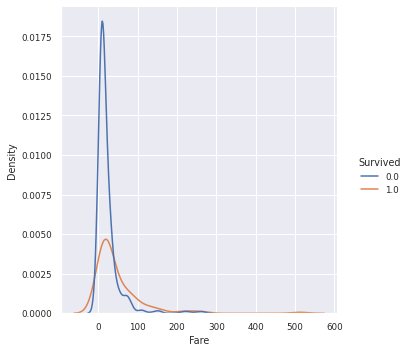

In [114]:
sns.displot(x='Fare', kind='kde', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

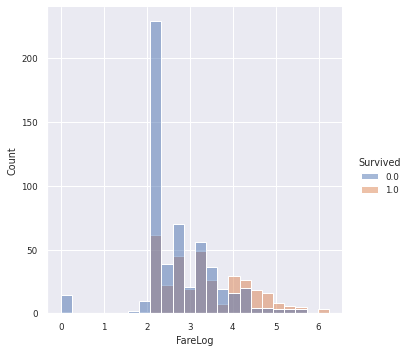

In [115]:
data['FareLog'] = np.log1p(data['Fare'])

sns.displot(x='FareLog', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

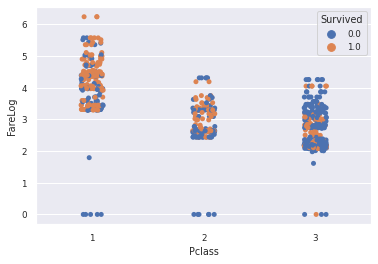

In [116]:
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

In [117]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [118]:
print("Embarked 열의 최빈값 : ", data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈값 :  S


S    916
C    270
Q    123
Name: Embarked, dtype: int64

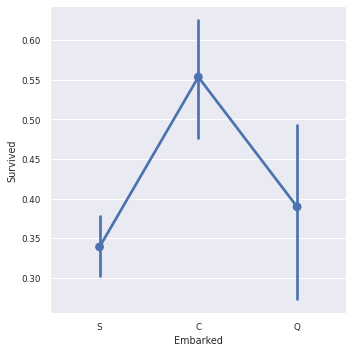

In [119]:
sns.catplot(x='Embarked', y ='Survived', kind='point', data=data[data['TrainSplit']=='Train'])
plt.show()

In [120]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [121]:
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

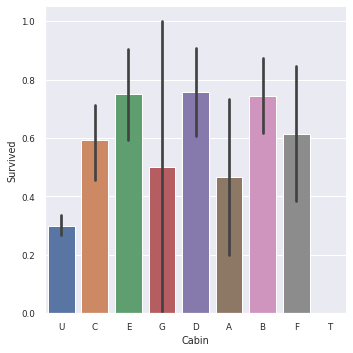

In [122]:
data['Cabin']=data['Cabin'].str.slice(0,1)
data['Cabin']=data['Cabin'].fillna('U')

sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

In [123]:
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [124]:
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

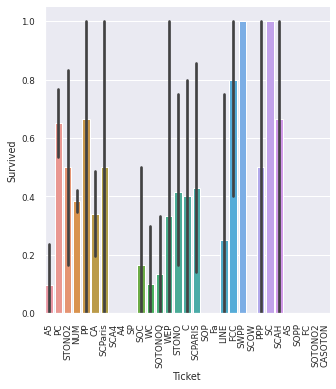

In [125]:
data.loc[data['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)[:10]

sns.catplot(x='Ticket', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()

In [126]:
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']].head()

,Title,AgeBin
0,2,9
1,3,1
2,1,9
3,3,0
4,2,0


In [127]:
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
  data[col] = data[col].astype('category')
  data = pd.get_dummies(data, columns = [col], prefix=col[:3], drop_first=True)
  onehot_prefix.append(col[:3])

data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col!='TrainSplit']

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data.loc[:, scaled_cols] = data_scaled[:, :]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.142857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
selected_features = ['Pclass', 'Sex', 'SibSp', 'Parch',
       'Title', 'AgeBin', 'FamilySize', 'FareLog', 
       'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G',
       'Cab_T', 'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS',
       'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa',
       'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
       'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
       'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
       'Tic_SWPP', 'Tic_WC', 'Tic_WEP']

len(selected_features)

54